<a href="https://colab.research.google.com/github/geographybuff/Earth_Venus_Mars_Triangle/blob/main/Earth_Mars_Venus_Triangle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#Library for interpreting planet position data
!pip install skyfield

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.0/446.0 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.1/232.1 kB 13.9 MB/s eta 0:00:00


In [34]:
#Source data for planet positions
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/spk/planets/de440s.bsp

--2023-04-29 22:03:10--  https://naif.jpl.nasa.gov/pub/naif/generic_kernels/spk/planets/de440s.bsp
Resolving naif.jpl.nasa.gov (naif.jpl.nasa.gov)... 137.78.232.95
Connecting to naif.jpl.nasa.gov (naif.jpl.nasa.gov)|137.78.232.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32726016 (31M)
Saving to: ‘de440s.bsp’

de440s.bsp          100%[===================>]  31.21M  66.2MB/s    in 0.5s    

2023-04-29 22:03:11 (66.2 MB/s) - ‘de440s.bsp’ saved [32726016/32726016]



In [126]:
import numpy as np
from skyfield.api import load

In [104]:
def triangle_area(t):
    # Get the positions of Earth, Venus, and Mars at the given time
    kernel = load('de440s.bsp')
    ts = load.timescale()
    positions = np.array([
        #Lengths are in astronomical units
        kernel['Earth'].at(t).position.au,
        kernel["Mars Barycenter"].at(t).position.au,
        kernel["Venus Barycenter"].at(t).position.au
    ])
    # Calculate the area of the triangle formed by the positions
    a = np.linalg.norm(positions[0] - positions[1])
    b = np.linalg.norm(positions[1] - positions[2])
    c = np.linalg.norm(positions[2] - positions[0])
    s = (a + b + c) / 2
    area = np.sqrt(s * (s - a) * (s - b) * (s - c))
    return area

In [106]:
t = ts.now()
areas = []
# Measures triangle size for 3654 days for the last 10 years
for i in range(3654):
  area = triangle_area(t-3653+i)
  areas.append(area)

In [107]:
from matplotlib import pyplot as plt

In [118]:
areas.index(max(areas))

2207

2207 days after the beginning of the timeframe, we do indeed see a near maximized area triangle between Earth, Venus, and Mars:


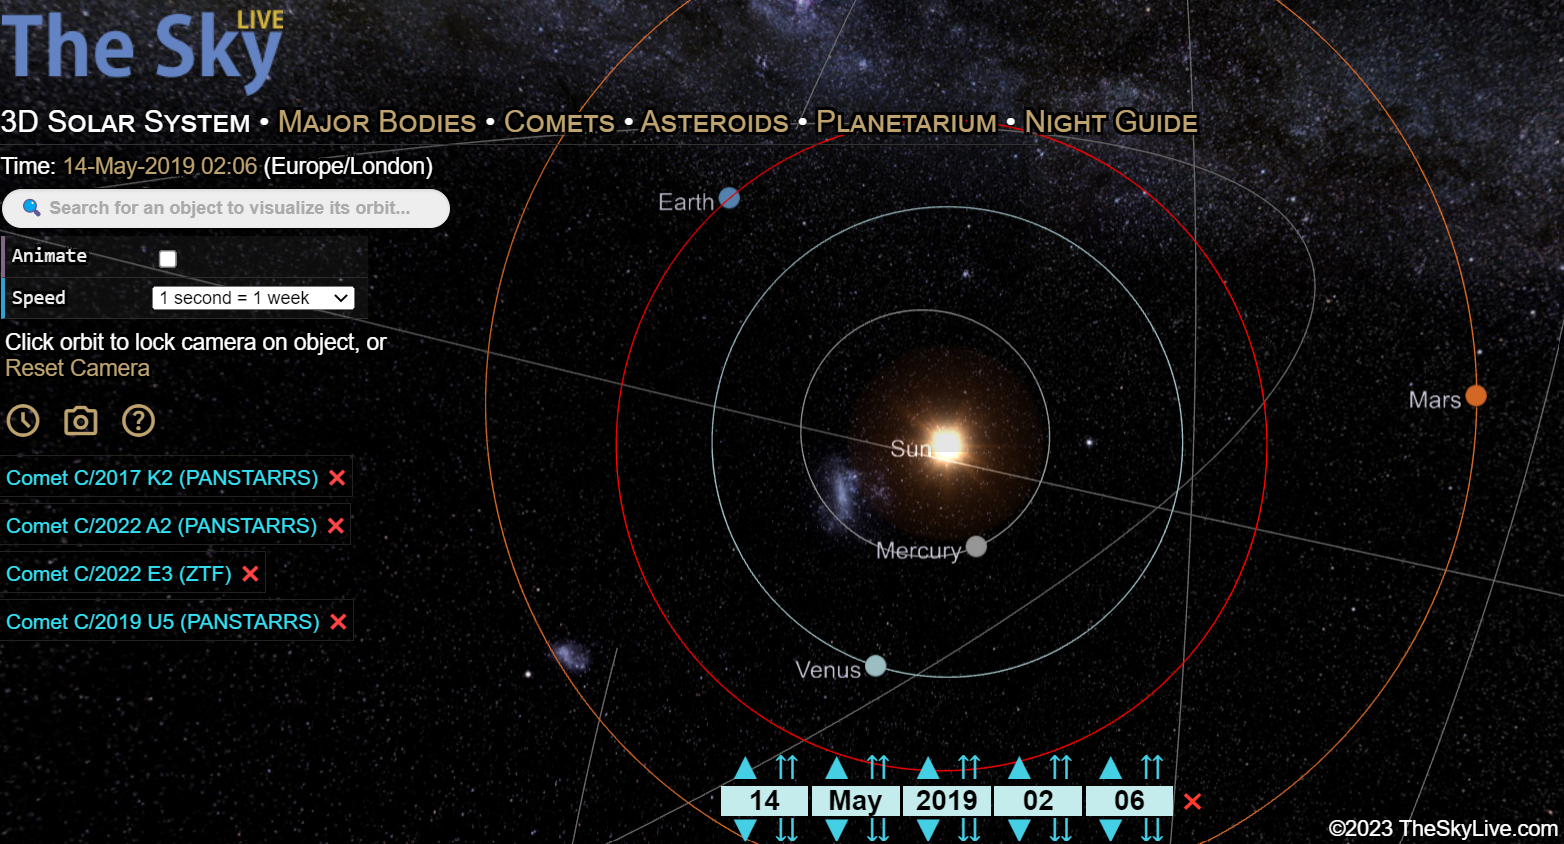

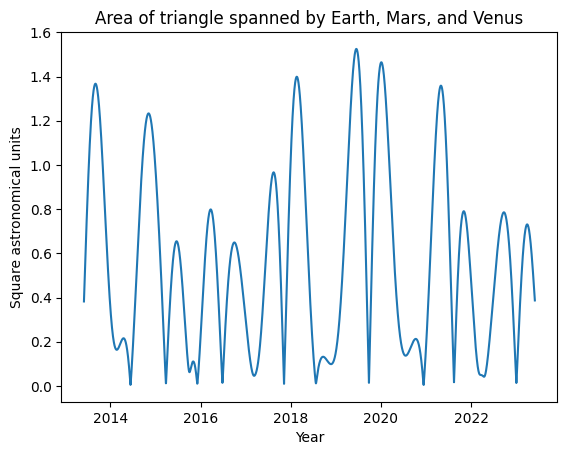

In [125]:
first_year = float((t-3653).utc.year+(30*(t-3653).utc.month+(t-3653).utc.day)/360)
plt.plot([i/365.25+first_year for i in range(3654)], areas)
plt.title("Area of triangle spanned by Earth, Mars, and Venus")
plt.ylabel("Square astronomical units")
plt.xlabel("Year")
plt.show()